### Let's start to gather our dataset ` boston`

In [1]:
import numpy as np, pandas as pd, matplotlib as mpl
import matplotlib.pyplot as plt, seaborn as sns
import os
import zipfile, tarfile
import urllib

In [2]:
url = 'http://lib.stat.cmu.edu/datasets/boston'
path = os.path.join('datasets', 'boston', '')
file_name = 'boston.csv'
file_path = os.path.join(path, file_name)

In [3]:
def gather_data(url=url, path=path):
    if not os.path.isdir(path):
        os.makedirs(path)
    urllib.request.urlretrieve(url, file_path)

In [4]:
gather_data()

### Load data

Let's slice and dice our data so that we can prepare it for our research.

In [71]:
def load_data(path=path):
    df = pd.read_csv(file_path, skiprows=22, header=None)
    return df

In [72]:
df = load_data()
df.head()

,0
0,0.00632 18.00 2.310 0 0.5380 6.5750 65...
1,396.90 4.98 24.00
2,0.02731 0.00 7.070 0 0.4690 6.4210 78...
3,396.90 9.14 21.60
4,0.02729 0.00 7.070 0 0.4690 7.1850 61...


In [73]:
df.shape

(1012, 1)

In [74]:
import regex as re

In [75]:
# let's define a function to clean our dataframe and change it's structure
list_cols = []
def clean_df(df):
    df_ = df.copy()
    concat = np.zeros((14,))
    for idx in range(int(df_.shape[0])):
        if idx%2==0:
             list_ = (df_.iloc[idx, 0]+df_.iloc[idx+1, 0])
             list_ = re.split(r' ', list_)
             list_= np.array([i for i in list_ if not i==''])
             concat = np.r_['0,2', concat, list_]
    df_ = pd.DataFrame(concat, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'], dtype=np.float)
    df_.drop([0], axis=0, inplace=True)
    df_cleaned = df_.reset_index(drop=True)
    return df_cleaned

In [76]:
df_org = clean_df(df) # 1st cleaning step is Done!

### We could clean|repair our dataframe structure into a size of (506 rows, 14 attributes), like this:

In [77]:
df_org.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [78]:
df_org.shape

(506, 14)

In [79]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


### let's convert the data type of the the two attributes `CHAS`, `RAD` into integer instead of float

In [80]:
df_org.CHAS = df_org.CHAS.values.astype('int64')
df_org.RAD = df_org.RAD.values.astype('int64')

In [81]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [82]:
df_org.CHAS.value_counts()
df_org.RAD.value_counts() # Done!

24    132
5     115
4     110
3      38
6      26
8      24
2      24
1      20
7      17
Name: RAD, dtype: int64

### We could prepare our data for the research by preparing the data structure very well and cleaning data types <br>
It's the time to start our research: to predict both the nitrous oxide concentration `NOX`, the median value of home `MEDV`

In [299]:
df_org

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


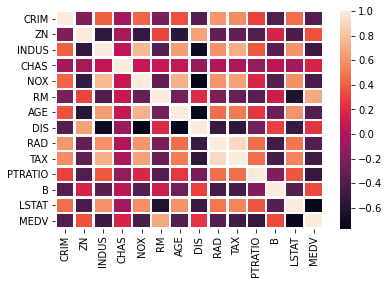

In [298]:
# let's investigate the correlation matrix
cor_mat = df_org.corr()
sns.heatmap(cor_mat, linewidths=1.5)
plt.show()

In [20]:
# let's investigate the highly -ve, +ve correlated attributes with the median house value attribute
cor_mat.MEDV.sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

### It's obvious the high positive correlation between the average number of rooms per home with the median house value -> the bigger size, the median house value.
Also, **there is a very high negative correlation between the median house value and %lower status of population as well.**

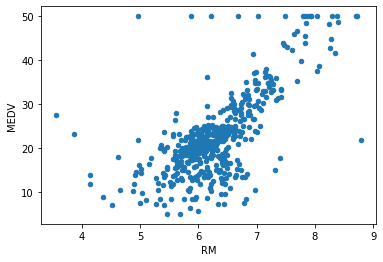

In [21]:
df_org.plot(kind='scatter', x='RM', y='MEDV')

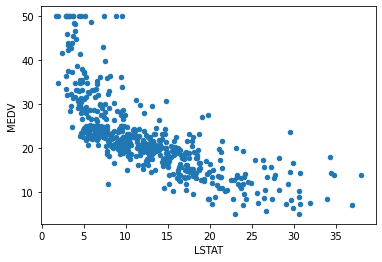

In [22]:
df_org.plot(kind='scatter', x='LSTAT', y='MEDV')

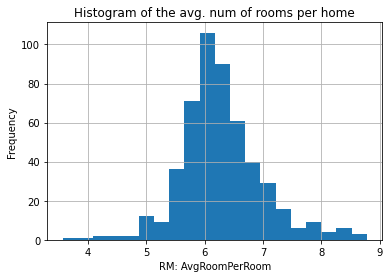

In [36]:
df_org.RM.plot(kind='hist', bins=20)
plt.grid()
plt.title('Histogram of the avg. num of rooms per home')
plt.xlabel('RM: AvgRoomPerRoom')
plt.show() # Symmetric data

### It's obvious that the % lower status is decreasing so the population income in boston is good|high.

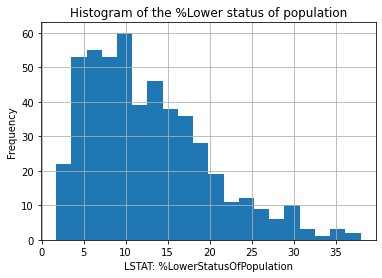

In [37]:
df_org.LSTAT.plot(kind='hist', bins=20)
plt.grid()
plt.title('Histogram of the %Lower status of population')
plt.xlabel('LSTAT: %LowerStatusOfPopulation')
plt.show() # Positively skewed.

In [645]:
# We aim here to categorize the %lower status attribute to help us split our dataframe securely.
df_ = df_org.copy()
lower_status_cut = pd.cut(df_.LSTAT, bins=[0, 5, 10, 15, 20, 25, 30, np.inf], labels=[1, 2, 3, 4, 5, 6, 7])
df_['LSTAT_cut'] = lower_status_cut

In [646]:
df_.info() # Done!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   CRIM       506 non-null    float64 
 1   ZN         506 non-null    float64 
 2   INDUS      506 non-null    float64 
 3   CHAS       506 non-null    int64   
 4   NOX        506 non-null    float64 
 5   RM         506 non-null    float64 
 6   AGE        506 non-null    float64 
 7   DIS        506 non-null    float64 
 8   RAD        506 non-null    int64   
 9   TAX        506 non-null    float64 
 10  PTRATIO    506 non-null    float64 
 11  B          506 non-null    float64 
 12  LSTAT      506 non-null    float64 
 13  MEDV       506 non-null    float64 
 14  LSTAT_cut  506 non-null    category
dtypes: category(1), float64(12), int64(2)
memory usage: 56.3 KB


### Let's split our dataframe into training and testing sets based on all stratas of the %LowerStaus of population attribute because it shows us the strongest linear correlation with the target attribute MEDV

In [647]:
from sklearn.model_selection import StratifiedShuffleSplit

splitting_obj = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [648]:
for train_idx, test_idx in splitting_obj.split(df_, df_.LSTAT_cut):
    train_df = df_.loc[train_idx]
    test_df = df_.loc[test_idx]

In [649]:
train_df.shape, test_df.shape

((404, 15), (102, 15))

In [650]:
train_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,LSTAT_cut
123,0.15038,0.0,25.65,0,0.581,5.856,97.0,1.9444,2,188.0,19.1,370.31,25.41,17.3,6
323,0.28392,0.0,7.38,0,0.493,5.708,74.3,4.7211,5,287.0,19.6,391.13,11.74,18.5,3
166,2.01019,0.0,19.58,0,0.605,7.929,96.2,2.0459,5,403.0,14.7,369.30,3.70,50.0,1
214,0.28955,0.0,10.59,0,0.489,5.412,9.8,3.5875,4,277.0,18.6,348.93,29.55,23.7,6
94,0.04294,28.0,15.04,0,0.464,6.249,77.3,3.6150,4,270.0,18.2,396.90,10.59,20.6,3


the contribution of the LSTAT categories in the dataframe of both the training and testing is equally represented so as not to have **sampling bias**

In [651]:
train_df.LSTAT_cut.value_counts()/train_df.shape[0]

2    0.309406
3    0.247525
4    0.173267
1    0.121287
5    0.079208
6    0.044554
7    0.024752
Name: LSTAT_cut, dtype: float64

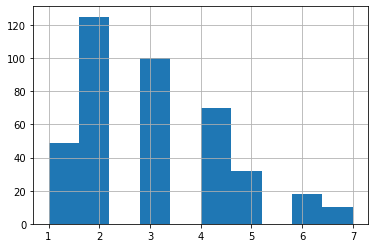

In [652]:
train_df.LSTAT_cut.hist()

In [653]:
test_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,LSTAT_cut
266,0.78570,20.0,3.97,0,0.647,7.014,84.6,2.1329,5,264.0,13.0,384.07,14.79,30.7,3
263,0.82526,20.0,3.97,0,0.647,7.327,94.5,2.0788,5,264.0,13.0,393.42,11.25,31.0,3
192,0.08664,45.0,3.44,0,0.437,7.178,26.3,6.4798,5,398.0,15.2,390.49,2.87,36.4,1
53,0.04981,21.0,5.64,0,0.439,5.998,21.4,6.8147,4,243.0,16.8,396.90,8.43,23.4,2
42,0.14150,0.0,6.91,0,0.448,6.169,6.6,5.7209,3,233.0,17.9,383.37,5.81,25.3,2


In [319]:
test_df.LSTAT_cut.value_counts()/test_df.shape[0] # Great Job!

2    0.313725
3    0.245098
4    0.176471
1    0.127451
5    0.078431
6    0.039216
7    0.019608
Name: LSTAT_cut, dtype: float64

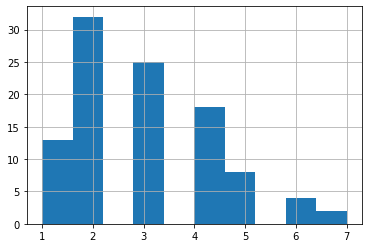

In [324]:
test_df.LSTAT_cut.hist()

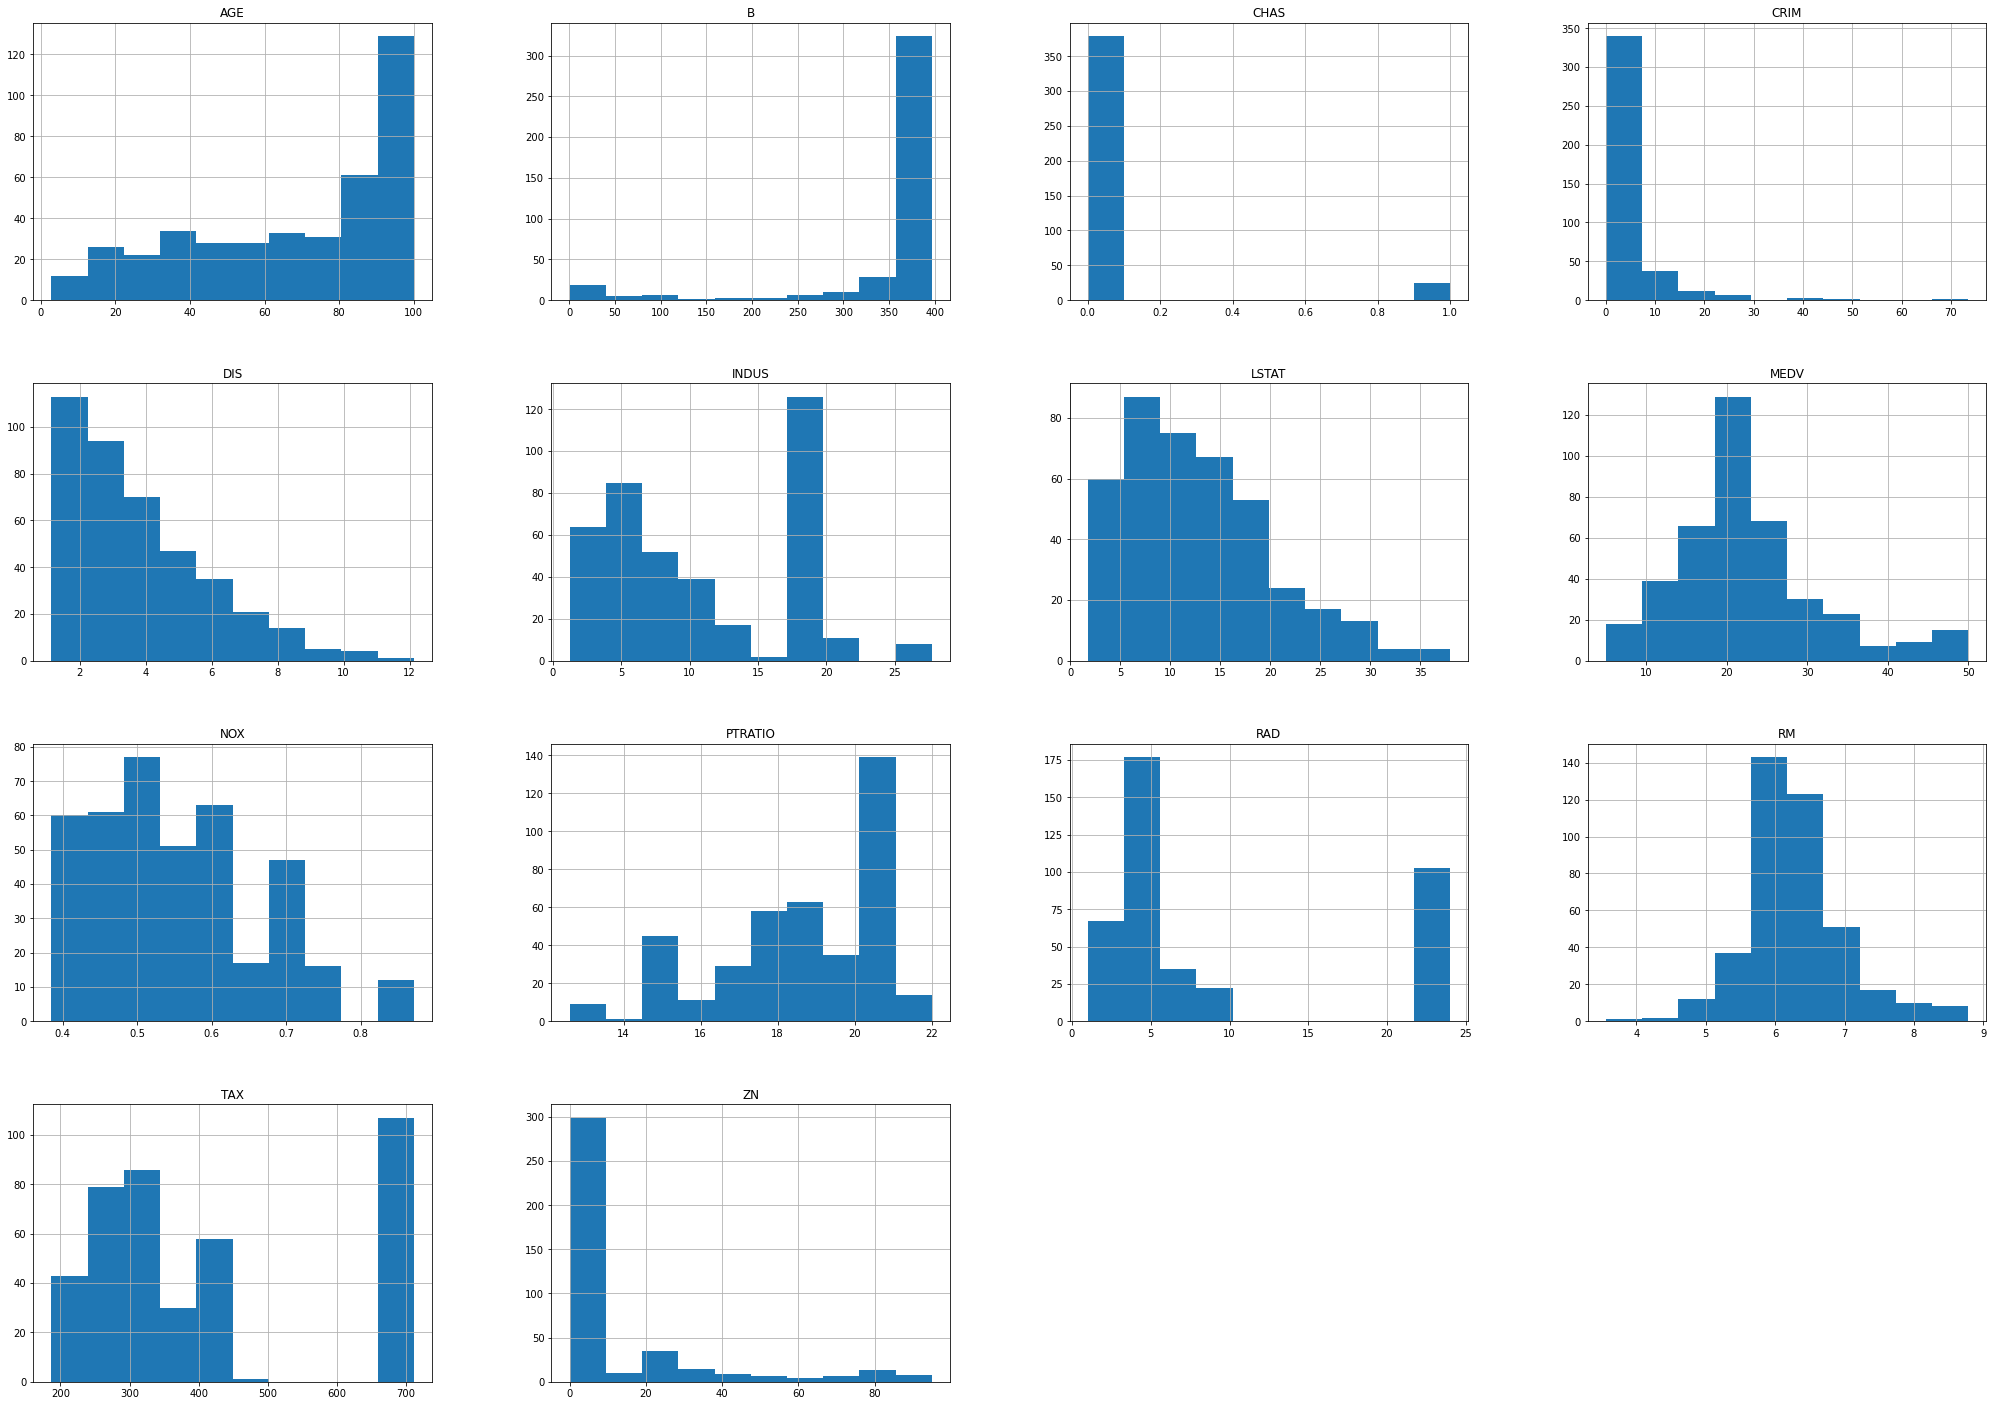

In [325]:
train_df.hist(bins=10, figsize=(35, 25))
plt.show()

### We detected a line in the scatter plot with about 50k median house value which indicates some kind of capping for data that may generate a kind of limitation in the model predictions

In [326]:
train_df[df_org.MEDV==50].MEDV

<ipython-input-326-a7f1a4cf0a69>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_df[df_org.MEDV==50].MEDV


166    50.0
186    50.0
371    50.0
267    50.0
225    50.0
368    50.0
161    50.0
162    50.0
283    50.0
257    50.0
Name: MEDV, dtype: float64

In [338]:
df_ = train_df.copy()
df_.drop(['LSTAT_cut'], axis=1, inplace=True)

### Let's start our feature extraction process to investigate if this process may have an impact on the MEDV or not.

In [339]:
df_

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
123,0.15038,0.0,25.65,0,0.581,5.856,97.0,1.9444,2,188.0,19.1,370.31,25.41,17.3
323,0.28392,0.0,7.38,0,0.493,5.708,74.3,4.7211,5,287.0,19.6,391.13,11.74,18.5
166,2.01019,0.0,19.58,0,0.605,7.929,96.2,2.0459,5,403.0,14.7,369.30,3.70,50.0
214,0.28955,0.0,10.59,0,0.489,5.412,9.8,3.5875,4,277.0,18.6,348.93,29.55,23.7
94,0.04294,28.0,15.04,0,0.464,6.249,77.3,3.6150,4,270.0,18.2,396.90,10.59,20.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,0.14932,25.0,5.13,0,0.453,5.741,66.2,7.2254,8,284.0,19.7,395.11,13.15,18.7
465,3.16360,0.0,18.10,0,0.655,5.759,48.2,3.0665,24,666.0,20.2,334.40,14.13,19.9
145,2.37934,0.0,19.58,0,0.871,6.130,100.0,1.4191,5,403.0,14.7,172.91,27.80,13.8
12,0.09378,12.5,7.87,0,0.524,5.889,39.0,5.4509,5,311.0,15.2,390.50,15.71,21.7


In [340]:
df_['zoneperblack'] = df_.ZN/df_.B
df_['blackperlowerstatus'] = df_.B/df_.LSTAT
df_['rmperlowerstatus'] = df_.RM/df_.LSTAT # very great!
df_['distperlowerstatus'] = df_.DIS/df_.LSTAT # very great!
df_['distperradial'] = df_.RAD/df_.DIS # very great!
df_['zoneperlowerstatus'] = df_.ZN/df_.LSTAT # weak!
df_['zonepernonretail'] = df_org.INDUS/df_.ZN
df_['distpernonretail'] = df_.INDUS/df_org.DIS
df_['rmpernonretail'] = df_.INDUS/df_.RM # great!
df_['crimeperblack'] = df_.B/df_.CRIM
df_['taxperblack'] = df_.B/df_.TAX
df_['noxperblack'] = df_.NOX/df_.B
df_['noretailperblack'] = df_.B/df_.INDUS
df_['taxperdist'] = df_.TAX/df_.DIS
df_['crimeperpt'] = df_.PTRATIO/df_.CRIM
df_['crimeperlowerstatus'] = df_.CRIM/df_.LSTAT
df_['ageperpt'] = df_.PTRATIO/df_.AGE
df_['ageperdist'] = df_.AGE/df_.DIS
df_['ageperzone'] = df_.ZN/df_.AGE
df_['noxperdist'] = df_.NOX/df_.DIS
df_['noxpercrime'] = df_.CRIM/df_.NOX
df_['noxperage'] = df_.AGE/df_.NOX
df_['noxperzone'] = df_.ZN/df_.NOX
df_['noxpernonretail'] = df_.INDUS/df_.NOX
df_['rmpernox'] = df_.RM/df_.NOX # great.
df_['rmperpt'] = df_.RM/df_.PTRATIO # great.
df_['rmpercrime'] = df_.CRIM/df_.RM 
df_['rmpertax'] = df_.CRIM/df_.TAX
df_['taxpernonretail'] = df_.TAX/df_.INDUS # very weak.
df_['taxperage'] = df_.TAX/df_.AGE # very weak.
cor_mat = df_.corr()
cor_mat.MEDV.sort_values(ascending=False)

MEDV                   1.000000
rmperlowerstatus       0.803942
blackperlowerstatus    0.794094
rmperpt                0.756872
RM                     0.705241
rmpernox               0.663889
distperlowerstatus     0.566444
taxperblack            0.541901
noretailperblack       0.501042
zoneperlowerstatus     0.391024
B                      0.353168
ZN                     0.341978
zoneperblack           0.339121
noxperzone             0.325307
taxpernonretail        0.312414
ageperzone             0.292325
crimeperblack          0.291577
crimeperpt             0.277579
DIS                    0.259195
ageperpt               0.159415
CHAS                   0.120139
taxperage              0.079723
noxperblack           -0.085964
noxperage             -0.216859
crimeperlowerstatus   -0.264770
zonepernonretail      -0.270375
AGE                   -0.373905
ageperdist            -0.377496
noxperdist            -0.389795
noxpercrime           -0.415577
rmpercrime            -0.421164
rmpertax

### Now, We have a very strong +ve relationship for the extracted attribute black proportion / % lower-status of the population
Let's investigate the distribution of the black people per town more in depth.

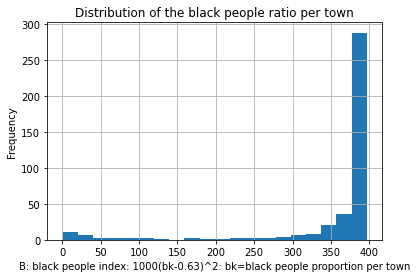

In [342]:
df_.B.plot(kind='hist', bins=20)
plt.title('Distribution of the black people ratio per town')
plt.grid()
plt.xlabel('B: black people index: 1000(bk-0.63)^2: bk=black people proportion per town')
plt.show() # Negatively-skewed distribution -> we can deduce that the most values

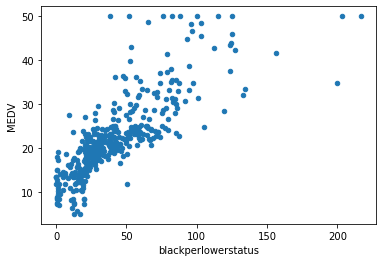

In [343]:
df_.plot(kind='scatter', x='blackperlowerstatus', y='MEDV')
plt.show()

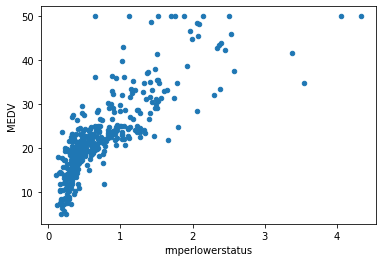

In [345]:
df_.plot(kind='scatter', x='rmperlowerstatus', y='MEDV')
plt.show()

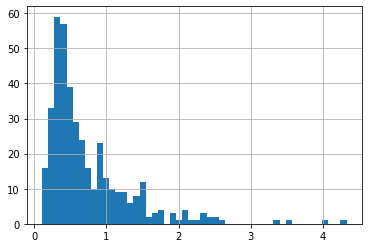

In [346]:
df_.rmperlowerstatus.hist(bins=50)

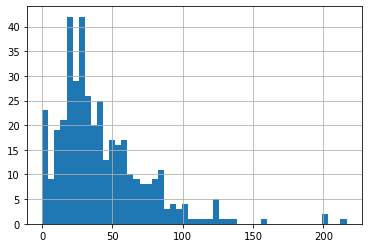

In [347]:
df_.blackperlowerstatus.hist(bins=50)

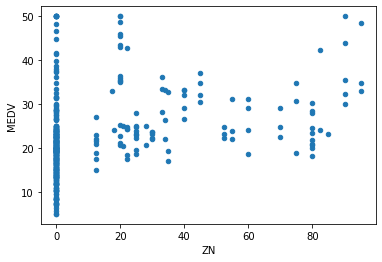

In [344]:
df_.plot(kind='scatter', x='ZN', y='MEDV')

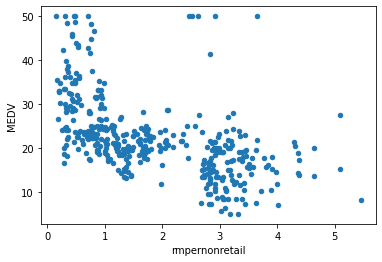

In [348]:
df_.plot(kind='scatter', x='rmpernonretail', y='MEDV')
plt.show()

### Let's investigate the relationship between the B: attribute and the bk: black proportion per town where:
bk = sqrt(B)/31.62 + 0.63

### By increasing of the B: attribute index of black people, we conclude an increment in the black people proportion bk.

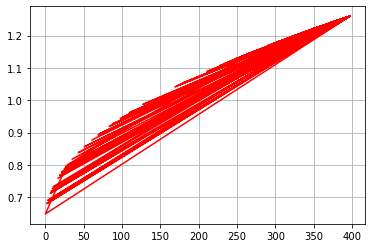

In [349]:
bk = np.sqrt(df_.B/1000) + 0.63 # y
plt.plot(df_.B, bk, 'r-') # +ve-relationship
plt.grid()
plt.show()

In [352]:
cor_mat.MEDV.sort_values(ascending=False)

MEDV                   1.000000
rmperlowerstatus       0.803942
blackperlowerstatus    0.794094
rmperpt                0.756872
RM                     0.705241
rmpernox               0.663889
distperlowerstatus     0.566444
taxperblack            0.541901
noretailperblack       0.501042
zoneperlowerstatus     0.391024
B                      0.353168
ZN                     0.341978
zoneperblack           0.339121
noxperzone             0.325307
taxpernonretail        0.312414
ageperzone             0.292325
crimeperblack          0.291577
crimeperpt             0.277579
DIS                    0.259195
ageperpt               0.159415
CHAS                   0.120139
taxperage              0.079723
noxperblack           -0.085964
noxperage             -0.216859
crimeperlowerstatus   -0.264770
zonepernonretail      -0.270375
AGE                   -0.373905
ageperdist            -0.377496
noxperdist            -0.389795
noxpercrime           -0.415577
rmpercrime            -0.421164
rmpertax

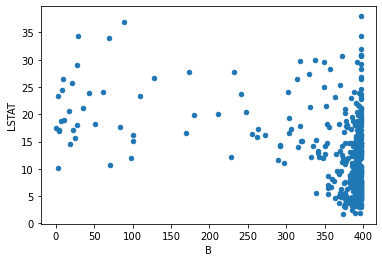

In [351]:
df_.plot(kind='scatter', x='B', y='LSTAT') # weak-relationship

* Note about the extracted attributes that will be created due to the detected high(+ve, -ve) relationship
1.  RM/LSTAT
2.  B/LSTAT
3.  RM/PTRATIO
4.  RM/NOX
5.  DIST/LSTAT
6.  TAX/B
7.  INDUS/B
8.  ZN/LSTAT
9.  RM/INDUS
10. NOX/INDUS
11. DIST/INDUS
12. TAX/DIST

the used attributes: `LSTAT`, `RM`, `B`, `PTRATIO`, `NOX`, `DIST`, `INDUS`, `TAX`, `ZN` = 9 attributes/14

In [362]:
train_df.drop(['LSTAT_cut'], axis=1, inplace=True)

In [379]:
# Drop the target attribute from the training dataset
X_train = train_df.drop(['MEDV'], axis=1)

# Extract the target label
y_train = train_df.MEDV.copy()

In [397]:
X_train.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
123,0.15038,0.0,25.65,0,0.581,5.856,97.0,1.9444,2,188.0,19.1,370.31,25.41


In [380]:
from sklearn.base import BaseEstimator, TransformerMixin

In [398]:
idx_ZN, idx_INDUS, idx_NOX, idx_RM, idx_DIS, idx_TAX, idx_PTRATIO, idx_B, idx_LSTAT = (1, 2, 4, 5, 7, 9, 10, 11, 12)

class attr_combiner_scaler(BaseEstimator, TransformerMixin):
      def __init__(self):
          pass  
      def fit(self, X, y=None):
          return self
      def transform(self, X, y=None):
          # to be sure that our data is in the numpy 2d array format not, a dataframe  
          np_array = X.values
          # start too combine our attributes
          rmperstat        = np_array[:, idx_RM]   / np_array[:, idx_LSTAT]
          bperstat         = np_array[:, idx_B]    / np_array[:, idx_LSTAT]
          rmperpt          = np_array[:, idx_RM]   / np_array[:, idx_PTRATIO]
          rmpernox         = np_array[:, idx_RM]   / np_array[:, idx_NOX]
          distperstat      = np_array[:, idx_DIS]  / np_array[:, idx_LSTAT]
          bpertax          = np_array[:, idx_B]    / np_array[:, idx_TAX]  
          bpernonretail    = np_array[:, idx_B]    / np_array[:, idx_INDUS]
          zperstat         = np_array[:, idx_ZN]   / np_array[:, idx_LSTAT]  
          nonretailperrm   = np_array[:, idx_INDUS]/ np_array[:, idx_RM]
          nonretailpernox  = np_array[:, idx_INDUS]/ np_array[:, idx_NOX]
          nonretailperdist = np_array[:, idx_INDUS]/ np_array[:, idx_DIS]
          taxperdist       = np_array[:, idx_TAX]  / np_array[:, idx_DIS]
          np_array = np.c_[np_array, rmperstat, bperstat, rmperpt, rmpernox, distperstat, bpertax, bpernonretail, zperstat, nonretailperrm, nonretailpernox, nonretailperdist, taxperdist]
          return np_array  

In [399]:
X_train.shape

(404, 13)

In [400]:
obj_trans = attr_combiner_scaler()

In [401]:
obj_trans.fit_transform(X_train)[:1, :][0] # Done!

array([1.50380000e-01, 0.00000000e+00, 2.56500000e+01, 0.00000000e+00,
       5.81000000e-01, 5.85600000e+00, 9.70000000e+01, 1.94440000e+00,
       2.00000000e+00, 1.88000000e+02, 1.91000000e+01, 3.70310000e+02,
       2.54100000e+01, 2.30460449e-01, 1.45733963e+01, 3.06596859e-01,
       1.00791738e+01, 7.65210547e-02, 1.96973404e+00, 1.44370370e+01,
       0.00000000e+00, 4.38012295e+00, 4.41480207e+01, 1.31917301e+01,
       9.66879243e+01])

In [402]:
### Let's integrate all our data preprocessing steps together wth a pipeline

In [403]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

full_pipeline = Pipeline([
    ('est1', attr_combiner_scaler()),
    ('est2', StandardScaler())
])

In [406]:
list_combined_attr = ['rmperstat', 'bperstat', 'rmperpt', 'rmpernox', 'distperstat', 'bpertax', 'bpernonretail', 'zperstat', 'nonretailperrm', 'nonretailpernox', 'nonretailperdist', 'taxperdist']
np_array = full_pipeline.fit_transform(X_train)
df_final = pd.DataFrame(np_array, columns=list(X_train)+list_combined_attr)
df_final # Great Job!

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,rmperpt,rmpernox,distperstat,bpertax,bpernonretail,zperstat,nonretailperrm,nonretailpernox,nonretailperdist,taxperdist
0,-0.412680,-0.485693,2.182822,-0.256833,0.253422,-0.616375,1.023992,-0.892818,-0.863563,-1.308812,...,-0.566364,-0.629657,-0.854990,1.868132,-0.786923,-0.407060,2.164712,2.650165,1.942527,-0.473915
1,-0.396573,-0.485693,-0.535455,-0.256833,-0.518124,-0.829224,0.221241,0.432608,-0.515958,-0.716078,...,-0.785253,-0.115629,-0.178163,0.627242,-0.108385,-0.407060,-0.440832,-0.395454,-0.707740,-0.748675
2,-0.188349,-0.485693,1.279705,-0.256833,0.463844,2.364943,0.995701,-0.844368,-0.515958,-0.021563,...,2.748370,0.408265,0.135307,-0.285558,-0.709077,-0.407060,0.552109,1.420122,1.117178,0.293726
3,-0.395894,-0.485693,-0.057860,-0.256833,-0.553195,-1.254921,-2.059705,-0.108503,-0.631826,-0.775950,...,-0.788909,-0.290733,-0.761696,0.416348,-0.461182,-0.407060,0.119438,0.302515,-0.391236,-0.622982
4,-0.425640,0.727413,0.604227,-0.256833,-0.772384,-0.051176,0.327331,-0.095376,-0.631826,-0.817861,...,-0.043009,0.532368,-0.304496,0.846377,-0.576603,0.122868,0.499249,1.425357,-0.115800,-0.642299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,-0.412808,0.597437,-0.870219,-0.256833,-0.868827,-0.781764,-0.065204,1.628007,-0.168353,-0.734040,...,-0.782450,0.259948,0.128061,0.685329,0.314291,-0.026021,-0.777876,-0.775923,-0.902194,-0.913125
400,-0.049225,-0.485693,1.059505,-0.256833,0.902222,-0.755877,-0.701747,-0.357196,1.685539,1.553072,...,-0.872474,-1.070944,-0.562948,-1.132584,-0.715868,-0.407060,1.120523,0.926404,0.281232,0.448388
401,-0.143822,-0.485693,1.279705,-0.256833,2.796017,-0.222318,1.130083,-1.143564,-0.515958,-0.021563,...,1.005775,-1.672611,-0.907941,-1.281932,-0.885569,-0.407060,1.163752,0.388468,2.080583,0.959661
402,-0.419507,0.055872,-0.462551,-0.256833,-0.246330,-0.568916,-1.027091,0.780970,-0.515958,-0.572386,...,0.584687,-0.232070,-0.292835,0.408071,-0.167857,-0.247586,-0.404146,-0.390286,-0.734952,-0.777272


In [407]:
np_array

array([[-0.41268031, -0.48569276,  2.18282186, ...,  2.65016461,
         1.94252696, -0.47391518],
       [-0.39657266, -0.48569276, -0.53545541, ..., -0.39545405,
        -0.7077405 , -0.74867489],
       [-0.18834934, -0.48569276,  1.27970511, ...,  1.42012172,
         1.11717806,  0.29372643],
       ...,
       [-0.14382233, -0.48569276,  1.27970511, ...,  0.38846752,
         2.08058322,  0.95966083],
       [-0.41950742,  0.05587236, -0.46255143, ..., -0.39028625,
        -0.73495229, -0.77727156],
       [-0.40405595,  0.38081144, -0.59794455, ..., -0.39227822,
        -0.7007302 , -0.82307489]])

### Let's start the machin learning process

#### let's try the stochastic gradient descent regressor first

In [411]:
df_final.values.shape

(404, 25)

In [412]:
df_final.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,rmperpt,rmpernox,distperstat,bpertax,bpernonretail,zperstat,nonretailperrm,nonretailpernox,nonretailperdist,taxperdist
0,-0.412680,-0.485693,2.182822,-0.256833,0.253422,-0.616375,1.023992,-0.892818,-0.863563,-1.308812,...,-0.566364,-0.629657,-0.854990,1.868132,-0.786923,-0.407060,2.164712,2.650165,1.942527,-0.473915
1,-0.396573,-0.485693,-0.535455,-0.256833,-0.518124,-0.829224,0.221241,0.432608,-0.515958,-0.716078,...,-0.785253,-0.115629,-0.178163,0.627242,-0.108385,-0.407060,-0.440832,-0.395454,-0.707740,-0.748675
2,-0.188349,-0.485693,1.279705,-0.256833,0.463844,2.364943,0.995701,-0.844368,-0.515958,-0.021563,...,2.748370,0.408265,0.135307,-0.285558,-0.709077,-0.407060,0.552109,1.420122,1.117178,0.293726
3,-0.395894,-0.485693,-0.057860,-0.256833,-0.553195,-1.254921,-2.059705,-0.108503,-0.631826,-0.775950,...,-0.788909,-0.290733,-0.761696,0.416348,-0.461182,-0.407060,0.119438,0.302515,-0.391236,-0.622982
4,-0.425640,0.727413,0.604227,-0.256833,-0.772384,-0.051176,0.327331,-0.095376,-0.631826,-0.817861,...,-0.043009,0.532368,-0.304496,0.846377,-0.576603,0.122868,0.499249,1.425357,-0.115800,-0.642299


In [414]:
X_train = np_array.copy()

In [415]:
X_train

array([[-0.41268031, -0.48569276,  2.18282186, ...,  2.65016461,
         1.94252696, -0.47391518],
       [-0.39657266, -0.48569276, -0.53545541, ..., -0.39545405,
        -0.7077405 , -0.74867489],
       [-0.18834934, -0.48569276,  1.27970511, ...,  1.42012172,
         1.11717806,  0.29372643],
       ...,
       [-0.14382233, -0.48569276,  1.27970511, ...,  0.38846752,
         2.08058322,  0.95966083],
       [-0.41950742,  0.05587236, -0.46255143, ..., -0.39028625,
        -0.73495229, -0.77727156],
       [-0.40405595,  0.38081144, -0.59794455, ..., -0.39227822,
        -0.7007302 , -0.82307489]])

In [597]:
from sklearn.linear_model import SGDRegressor

model_SGD = SGDRegressor()

In [598]:
model_SGD.fit(X_train, y_train.values)

SGDRegressor()

In [599]:
train_pred = model_SGD.predict(X_train)

In [600]:
y_train.values[:10]

array([17.3, 18.5, 50. , 23.7, 20.6, 21.7, 29.1, 32.2, 13.1, 18.4])

In [601]:
train_pred[:10]

array([18.61477893, 18.98580606, 40.48325854, 13.84895388, 23.92615677,
       20.4383443 , 27.98506974, 29.26785392, 15.87819941, 18.45247674])

### Let's evaluate our SGD model performance on the training dataset

In [602]:
from sklearn.metrics import mean_squared_error

SGD_error_train = mean_squared_error(y_train.values, train_pred)
np.sqrt(SGD_error_train)

3.7165486099485876

Our model may have overfitted the training dataset, so we will evaluate for multiple training rounds

In [603]:
from sklearn.model_selection import cross_val_score

cross_SGD = cross_val_score(model_SGD, X_train, y_train.values, cv=10, scoring='neg_mean_squared_error')

np.sqrt(-cross_SGD).mean() # Great Job!

3.9487521299561337

We realized that the average error on multiple training rounds is approx. the same as the single training round on the training dataset so our model hasn't overfitted our data

### Let's train a random forest regressor! a much more powerful model

In [480]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor()

In [481]:
model_RFR.fit(X_train, y_train)

RandomForestRegressor()

In [482]:
# evaluate on the training dataset.
train_pred_RFR = model_RFR.predict(X_train)

In [507]:
np.sqrt(mean_squared_error(y_train.values, train_pred_RFR))

1.274512913171767

In [510]:
# evaluate on multiple training rounds
cross_RFR = cross_val_score(model_RFR, X_train, y_train.values, cv=10, scoring='neg_mean_squared_error')

In [511]:
np.sqrt(-cross_RFR).mean() # much better performance

3.4209854601195415

In [512]:
y_train.values[:10]

array([17.3, 18.5, 50. , 23.7, 20.6, 21.7, 29.1, 32.2, 13.1, 18.4])

In [513]:
train_pred_RFR[:10]

array([17.216, 19.097, 48.333, 21.558, 21.251, 20.305, 27.591, 31.37 ,
       12.276, 19.036])

### Let's try to fine-tune our model

In [526]:
from sklearn.model_selection import GridSearchCV

grid_param = [
    {'n_estimators':[2, 4, 6, 8, 10, 12, 14, 16, 20], 'max_features':[5, 6, 7,  8, 9, 10, 11, 12, 13]}
]

In [527]:
grid_cv = GridSearchCV(model_RFR, grid_param, cv=5, verbose=2, scoring='neg_mean_squared_error', return_train_score=True)

In [528]:
grid_cv.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] max_features=5, n_estimators=2 ..................................
[CV] ................... max_features=5, n_estimators=2, total=   0.0s
[CV] max_features=5, n_estimators=2 ..................................
[CV] ................... max_features=5, n_estimators=2, total=   0.0s
[CV] max_features=5, n_estimators=2 ..................................
[CV] ................... max_features=5, n_estimators=2, total=   0.0s
[CV] max_features=5, n_estimators=2 ..................................
[CV] ................... max_features=5, n_estimators=2, total=   0.0s
[CV] max_features=5, n_estimators=2 ..................................
[CV] ................... max_features=5, n_estimators=2, total=   0.0s
[CV] max_features=5, n_estimators=4 ..................................
[CV] ................... max_features=5, n_estimators=4, total=   0.0s
[CV] max_features=5, n_estimators=4 ..................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] max_features=5, n_estimators=6 ..................................
[CV] ................... max_features=5, n_estimators=6, total=   0.0s
[CV] max_features=5, n_estimators=6 ..................................
[CV] ................... max_features=5, n_estimators=6, total=   0.0s
[CV] max_features=5, n_estimators=8 ..................................
[CV] ................... max_features=5, n_estimators=8, total=   0.0s
[CV] max_features=5, n_estimators=8 ..................................
[CV] ................... max_features=5, n_estimators=8, total=   0.0s
[CV] max_features=5, n_estimators=8 ..................................
[CV] ................... max_features=5, n_estimators=8, total=   0.0s
[CV] max_features=5, n_estimators=8 ..................................
[CV] ................... max_features=5, n_estimators=8, total=   0.0s
[CV] max_features=5, n_estimators=8 ..................................
[CV] ................... max_features=5, n_estimators=8, total=   0.0s
[CV] 

[CV] .................. max_features=6, n_estimators=12, total=   0.0s
[CV] max_features=6, n_estimators=12 .................................
[CV] .................. max_features=6, n_estimators=12, total=   0.0s
[CV] max_features=6, n_estimators=12 .................................
[CV] .................. max_features=6, n_estimators=12, total=   0.0s
[CV] max_features=6, n_estimators=14 .................................
[CV] .................. max_features=6, n_estimators=14, total=   0.0s
[CV] max_features=6, n_estimators=14 .................................
[CV] .................. max_features=6, n_estimators=14, total=   0.0s
[CV] max_features=6, n_estimators=14 .................................
[CV] .................. max_features=6, n_estimators=14, total=   0.0s
[CV] max_features=6, n_estimators=14 .................................
[CV] .................. max_features=6, n_estimators=14, total=   0.0s
[CV] max_features=6, n_estimators=14 .................................
[CV] .

[CV] .................. max_features=7, n_estimators=20, total=   0.0s
[CV] max_features=7, n_estimators=20 .................................
[CV] .................. max_features=7, n_estimators=20, total=   0.1s
[CV] max_features=7, n_estimators=20 .................................
[CV] .................. max_features=7, n_estimators=20, total=   0.0s
[CV] max_features=8, n_estimators=2 ..................................
[CV] ................... max_features=8, n_estimators=2, total=   0.0s
[CV] max_features=8, n_estimators=2 ..................................
[CV] ................... max_features=8, n_estimators=2, total=   0.0s
[CV] max_features=8, n_estimators=2 ..................................
[CV] ................... max_features=8, n_estimators=2, total=   0.0s
[CV] max_features=8, n_estimators=2 ..................................
[CV] ................... max_features=8, n_estimators=2, total=   0.0s
[CV] max_features=8, n_estimators=2 ..................................
[CV] .

[CV] ................... max_features=9, n_estimators=6, total=   0.0s
[CV] max_features=9, n_estimators=6 ..................................
[CV] ................... max_features=9, n_estimators=6, total=   0.0s
[CV] max_features=9, n_estimators=8 ..................................
[CV] ................... max_features=9, n_estimators=8, total=   0.0s
[CV] max_features=9, n_estimators=8 ..................................
[CV] ................... max_features=9, n_estimators=8, total=   0.0s
[CV] max_features=9, n_estimators=8 ..................................
[CV] ................... max_features=9, n_estimators=8, total=   0.0s
[CV] max_features=9, n_estimators=8 ..................................
[CV] ................... max_features=9, n_estimators=8, total=   0.0s
[CV] max_features=9, n_estimators=8 ..................................
[CV] ................... max_features=9, n_estimators=8, total=   0.0s
[CV] max_features=9, n_estimators=10 .................................
[CV] .

[CV] max_features=10, n_estimators=12 ................................
[CV] ................. max_features=10, n_estimators=12, total=   0.0s
[CV] max_features=10, n_estimators=14 ................................
[CV] ................. max_features=10, n_estimators=14, total=   0.0s
[CV] max_features=10, n_estimators=14 ................................
[CV] ................. max_features=10, n_estimators=14, total=   0.0s
[CV] max_features=10, n_estimators=14 ................................
[CV] ................. max_features=10, n_estimators=14, total=   0.0s
[CV] max_features=10, n_estimators=14 ................................
[CV] ................. max_features=10, n_estimators=14, total=   0.0s
[CV] max_features=10, n_estimators=14 ................................
[CV] ................. max_features=10, n_estimators=14, total=   0.0s
[CV] max_features=10, n_estimators=16 ................................
[CV] ................. max_features=10, n_estimators=16, total=   0.0s
[CV] m

[CV] ................. max_features=11, n_estimators=20, total=   0.1s
[CV] max_features=11, n_estimators=20 ................................
[CV] ................. max_features=11, n_estimators=20, total=   0.1s
[CV] max_features=11, n_estimators=20 ................................
[CV] ................. max_features=11, n_estimators=20, total=   0.1s
[CV] max_features=12, n_estimators=2 .................................
[CV] .................. max_features=12, n_estimators=2, total=   0.0s
[CV] max_features=12, n_estimators=2 .................................
[CV] .................. max_features=12, n_estimators=2, total=   0.0s
[CV] max_features=12, n_estimators=2 .................................
[CV] .................. max_features=12, n_estimators=2, total=   0.0s
[CV] max_features=12, n_estimators=2 .................................
[CV] .................. max_features=12, n_estimators=2, total=   0.0s
[CV] max_features=12, n_estimators=2 .................................
[CV] .

[CV] .................. max_features=13, n_estimators=6, total=   0.0s
[CV] max_features=13, n_estimators=6 .................................
[CV] .................. max_features=13, n_estimators=6, total=   0.0s
[CV] max_features=13, n_estimators=6 .................................
[CV] .................. max_features=13, n_estimators=6, total=   0.0s
[CV] max_features=13, n_estimators=8 .................................
[CV] .................. max_features=13, n_estimators=8, total=   0.0s
[CV] max_features=13, n_estimators=8 .................................
[CV] .................. max_features=13, n_estimators=8, total=   0.0s
[CV] max_features=13, n_estimators=8 .................................
[CV] .................. max_features=13, n_estimators=8, total=   0.0s
[CV] max_features=13, n_estimators=8 .................................
[CV] .................. max_features=13, n_estimators=8, total=   0.0s
[CV] max_features=13, n_estimators=8 .................................
[CV] .

[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed:   13.3s finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [5, 6, 7, 8, 9, 10, 11, 12, 13],
                          'n_estimators': [2, 4, 6, 8, 10, 12, 14, 16, 20]}],
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=2)

In [530]:
grid_cv.best_params_, np.sqrt(-grid_cv.best_score_) # Great Job!

({'max_features': 9, 'n_estimators': 8}, 3.370102266154014)

### Let's try the random search cross validation fine-tuning for our RFR

In [614]:
from scipy.stats import randint

In [619]:
from sklearn.model_selection import RandomizedSearchCV

model_RFR_ = RandomForestRegressor()
random_dist = [
    {'n_estimators':randint(low=1, high=200), 'max_features':randint(low=1, high=13)}
]
    

In [620]:
rand_cv = RandomizedSearchCV(model_RFR_, grid_param, cv=5, verbose=2, scoring='neg_mean_squared_error', return_train_score=True)

In [626]:
rand_cv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=2, max_features=8 ..................................
[CV] ................... n_estimators=2, max_features=8, total=   0.0s
[CV] n_estimators=2, max_features=8 ..................................
[CV] ................... n_estimators=2, max_features=8, total=   0.0s
[CV] n_estimators=2, max_features=8 ..................................
[CV] ................... n_estimators=2, max_features=8, total=   0.0s
[CV] n_estimators=2, max_features=8 ..................................
[CV] ................... n_estimators=2, max_features=8, total=   0.0s
[CV] n_estimators=2, max_features=8 ..................................
[CV] ................... n_estimators=2, max_features=8, total=   0.0s
[CV] n_estimators=20, max_features=13 ................................
[CV] ................. n_estimators=20, max_features=13, total=   0.1s
[CV] n_estimators=20, max_features=13 ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................. n_estimators=20, max_features=13, total=   0.1s
[CV] n_estimators=20, max_features=13 ................................
[CV] ................. n_estimators=20, max_features=13, total=   0.1s
[CV] n_estimators=20, max_features=13 ................................
[CV] ................. n_estimators=20, max_features=13, total=   0.1s
[CV] n_estimators=20, max_features=13 ................................
[CV] ................. n_estimators=20, max_features=13, total=   0.1s
[CV] n_estimators=4, max_features=8 ..................................
[CV] ................... n_estimators=4, max_features=8, total=   0.0s
[CV] n_estimators=4, max_features=8 ..................................
[CV] ................... n_estimators=4, max_features=8, total=   0.0s
[CV] n_estimators=4, max_features=8 ..................................
[CV] ................... n_estimators=4, max_features=8, total=   0.0s
[CV] n_estimators=4, max_features=8 ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.8s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions=[{'max_features': [5, 6, 7, 8, 9, 10, 11,
                                                          12, 13],
                                         'n_estimators': [2, 4, 6, 8, 10, 12,
                                                          14, 16, 20]}],
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=2)

In [628]:
rand_cv.best_params_, np.sqrt(-rand_cv.best_score_)

({'n_estimators': 12, 'max_features': 9}, 3.3152472063065197)

In [630]:
grid_cv.best_estimator_

RandomForestRegressor(max_features=9, n_estimators=8)

In [633]:
grid_cv.best_estimator_.predict(X_train)[-10:]

array([19.6   , 31.025 , 14.7125, 17.35  , 33.4125, 18.85  , 20.1   ,
       14.1   , 21.7   , 34.5625])

In [634]:
y_train.values[-10:]

array([19.6, 33.2, 13.9, 17.4, 34.9, 18.7, 19.9, 13.8, 21.7, 35.2])

In [635]:
rand_cv.best_estimator_.predict(X_train)[-10:]

array([19.55833333, 32.14166667, 14.625     , 18.28333333, 33.88333333,
       18.975     , 18.99166667, 14.14166667, 22.15833333, 34.45      ])

### I feel that the randomized cross validation model best parameters are much flexible and effiecient on multiple training rounds

### Let's compute the 95% confidence interval for the squared error

In [592]:
from scipy import stats

In [596]:
conf = 0.95
grid_cv_pred = grid_cv.best_estimator_.predict(X_train)
squared_error =  (y_train.values-grid_cv_pred)**2
mean = squared_error.mean()
deg_f = len(squared_error)-1
t_val = stats.t.ppf((1+conf)/2, deg_f)
# 95% confidence interval of the squared error for our RFR model
mean-(t_val*(squared_error.std(ddof=1))/np.sqrt(len(squared_error))), mean+(t_val*(squared_error.std(ddof=1))/np.sqrt(len(squared_error)))

(1.14088313279931, 3.88806024591356)

**grid search cross validation RFR model** : mean error: 3.37 max_features=9, n_estimators=8<br>
**randomized search cross validation RFR model** : mean error: 3.31 max_features=9, n_estimators=12<br>
**stochastic gradient descent regressor model** : mean error: 3.94 **out of the 95% confiedence**

### Now, we want to test our RFR model on the testing dataset.

In [654]:
test_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,LSTAT_cut
266,0.78570,20.0,3.97,0,0.647,7.014,84.6,2.1329,5,264.0,13.0,384.07,14.79,30.7,3
263,0.82526,20.0,3.97,0,0.647,7.327,94.5,2.0788,5,264.0,13.0,393.42,11.25,31.0,3
192,0.08664,45.0,3.44,0,0.437,7.178,26.3,6.4798,5,398.0,15.2,390.49,2.87,36.4,1
53,0.04981,21.0,5.64,0,0.439,5.998,21.4,6.8147,4,243.0,16.8,396.90,8.43,23.4,2
42,0.14150,0.0,6.91,0,0.448,6.169,6.6,5.7209,3,233.0,17.9,383.37,5.81,25.3,2


In [658]:
# Preparing our testting dataset.
test_df.drop(['LSTAT_cut'], axis=1, inplace=True)
X_test = test_df.drop(['MEDV'], axis=1)
y_test = test_df.MEDV.copy()

In [659]:
y_test.values

array([30.7, 31. , 36.4, 23.4, 25.3, 15.7, 18.9, 20.6, 10.4, 14.2, 24.7,
       13.8, 23.3, 20.3, 20.1, 26.2, 22. , 29.4, 18.7, 25. , 21.7, 13.3,
        8.8, 33.8, 18.2, 14.5, 50. , 20.8, 29.8, 13.8, 12.7, 30.1,  9.7,
       23. , 27.5, 14.1, 20.6, 17.4, 23.9, 18.4, 11. , 50. , 22. , 19.3,
       19.7, 50. , 18.3, 20.5, 14.1, 25. , 29.6, 15.6, 50. , 27.1, 24.6,
       21.6, 13.1, 33.3, 20.3, 37.3, 22.3, 22.6, 13.4, 27.5, 34.6, 17.8,
       29.8, 24.5, 26.6, 13.1, 28.4, 31.6, 12.6, 21.2, 11.3, 23.1, 14.3,
       12.7, 13.3, 15. , 50. ,  7. , 20.4, 36.2, 24.4, 43.8, 32.4, 22.7,
       21.7,  8.4, 16.2, 13.1, 50. , 11.9, 16.5, 22.9, 22.9, 23.2, 33.2,
       18.5, 19.4, 16. ])

In [661]:
X_test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
266,0.78570,20.0,3.97,0,0.647,7.014,84.6,2.1329,5,264.0,13.0,384.07,14.79
263,0.82526,20.0,3.97,0,0.647,7.327,94.5,2.0788,5,264.0,13.0,393.42,11.25
192,0.08664,45.0,3.44,0,0.437,7.178,26.3,6.4798,5,398.0,15.2,390.49,2.87
53,0.04981,21.0,5.64,0,0.439,5.998,21.4,6.8147,4,243.0,16.8,396.90,8.43
42,0.14150,0.0,6.91,0,0.448,6.169,6.6,5.7209,3,233.0,17.9,383.37,5.81


In [662]:
X_test = full_pipeline.transform(X_test)

In [663]:
X_test

array([[-0.33604777,  0.38081144, -1.04280766, ..., -1.31749286,
        -0.63979563, -0.26658658],
       [-0.33127603,  0.38081144, -1.04280766, ..., -1.31749286,
        -0.62875563, -0.24193114],
       [-0.42036865,  1.46394168, -1.12166299, ..., -1.1363074 ,
        -0.94301599, -0.7438472 ],
       ...,
       [-0.42715113, -0.48569276, -0.86129161, ..., -0.90606638,
        -0.85334925, -0.90862879],
       [-0.42553723,  2.98032403, -1.13207785, ..., -1.07415144,
        -0.94783919, -0.82383158],
       [-0.41010748,  0.59743749, -0.87021863, ..., -0.77592309,
        -0.89253735, -0.89517098]])

In [664]:
grid_test_pred = grid_cv.best_estimator_.predict(X_test)

In [668]:
np.sqrt(mean_squared_error(y_test, grid_test_pred)), grid_cv.best_params_ # Great Job! we reached average error of 3.19

(3.1971686309767833, {'max_features': 9, 'n_estimators': 8})

In [669]:
random_test_pred = rand_cv.best_estimator_.predict(X_test)

In [671]:
np.sqrt(mean_squared_error(y_test, random_test_pred)), rand_cv.best_params_ # Oobs! very bad performance on the testing for the randomized search cv model.

(4.143952631194771, {'n_estimators': 12, 'max_features': 9})

### We concluded that the grid search cross valid model is better than the random search cv model of average error 3.197 on test data set

In [678]:
# saving our final model
import joblib
joblib.dump(grid_cv.best_estimator_, 'model_RFR_final.pkl')

['model_RFR_final.pkl']

In [679]:
# Done!